In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Questão 4

In [113]:
r = np.loadtxt('Q4.txt',dtype=str)
r = np.array([[i.replace(',','.')for i in j] for j in r]).astype(float)
r = r[:,0:]
Y = r[:,1]
X = r[:,2:]

In [120]:
def MMQ(x,y):

    try: 
        x = np.vstack((np.ones(x.shape[1]),x)).T
    except:
        x = np.vstack((np.ones(x.shape[0]),x)).T

    b = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))

    #print('Os coeficientes da sua regressão são: ', b)

    y_ = np.dot(b,x.T)
    r2 = 1 - (np.dot(y - y_,y - y_)/np.dot(y - np.mean(y),y - np.mean(y)))

    #print('O Coeficiente de Determinação foi calculado como:', r2)

    r2A = 1 - ((x.shape[0] - 1)*np.dot(y - y_,y - y_))/((x.shape[0] - x.shape[1] - 1)*np.dot(y - np.mean(y),y - np.mean(y)))
    
    #print('O Coeficiente de Determinação Ajustado foi calculado como:', r2A)
    return b,r2,r2A

In [160]:
def best_MMQ(Y,X):
    vetor = []
    historico = []
    r_historico = []
    while(True):
        r_max = 0
        max_ = 0
        for i in range(X.shape[1]):
            if(len(vetor)==0):
                x = X[:,i]
            else:
                v_ = np.copy(vetor)
                v_ = list(v_)
                if(i in vetor):
                    continue
                else:
                    v_.append(i)
                x = X[:,v_]
            _,r2,__ = MMQ(x.T,Y)
            if(r2 > r_max):
                r_max = r2
                max_ = i
        
        if((len(vetor)==0) or (r_max > r_historico[len(vetor)-1])):
            vetor.append(max_)
            historico.append(vetor)
            r_historico.append(r_max)
        else:
            break
    return historico[-1],r_historico[-1]

In [161]:
best_MMQ(Y,X)

([2, 4, 5, 0, 1, 3], 0.8467557342695833)

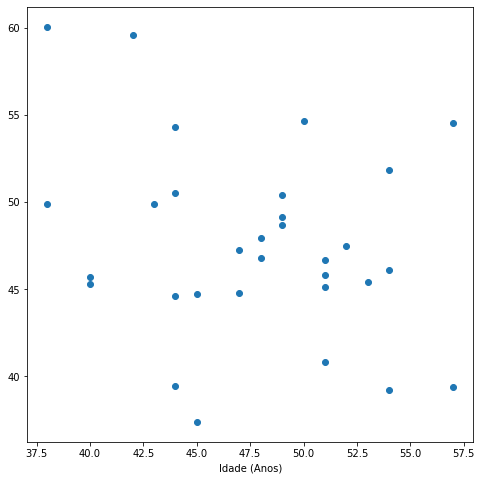

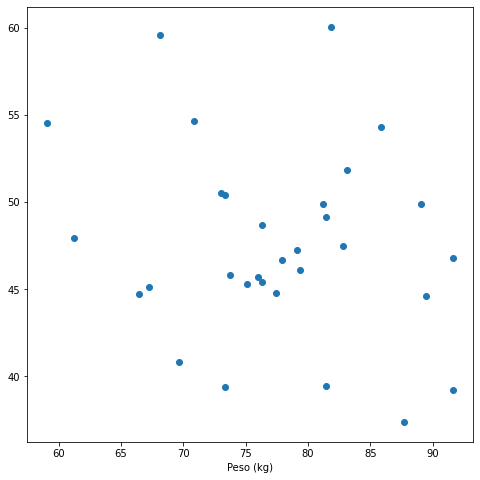

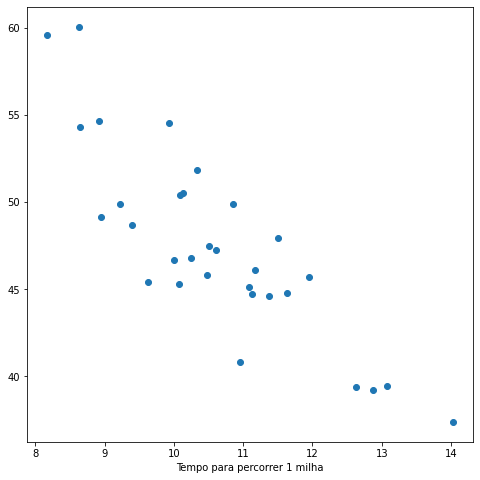

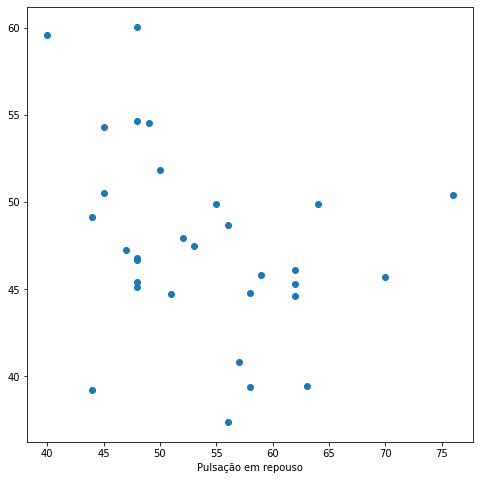

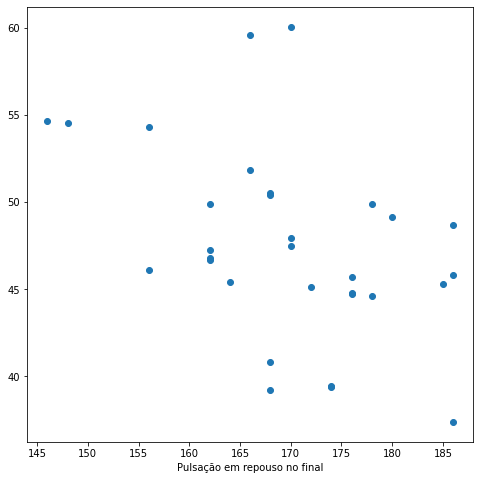

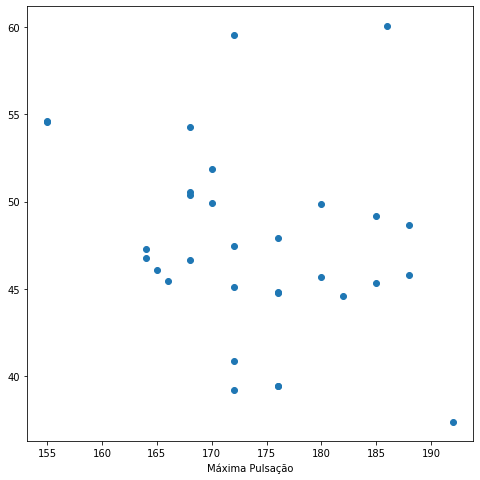

In [133]:
label = [
    'Idade (Anos)',
    'Peso (kg)',
    'Tempo para percorrer 1 milha',
    'Pulsação em repouso',
    'Pulsação em repouso no final',
    'Máxima Pulsação',
]
for i in range(X.shape[1]):
    x = X[:,i]
    plt.figure(figsize=(8,8))
    plt.scatter(x,Y)
    plt.xlabel(label[i])
    plt.ylabel("Consumo de Oxigênio (ml/kgmin)")
    plt.show()


ValueError: shapes (32,2) and (31,) not aligned: 2 (dim 1) != 31 (dim 0)

# Questão 5

In [11]:
y = np.array([1275,
1350,
1650,
2000,
3750,
4222,
5018,
6125,
6200,
8150,
9975,
12200,
12750,
13014,
13275])
x = np.array([
    230,
235,
250,
277,
522,
545,
625,
713,
735,
820,
992,
1322,
1900,
2022,
2155
])

Primeiro vamos analisar graficamente como se comporta a variável preditora em função dos dados. Tanto no caso liner quanto no caso log.

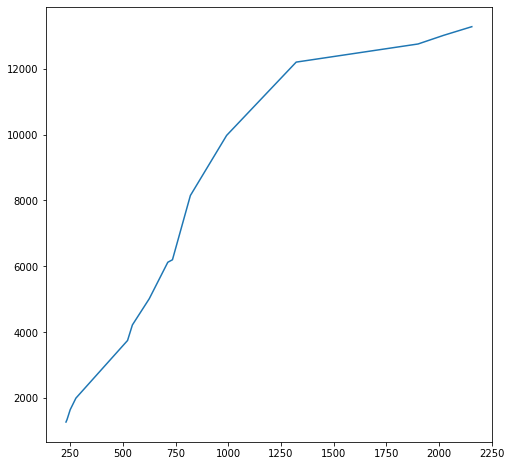

In [14]:
plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.show()

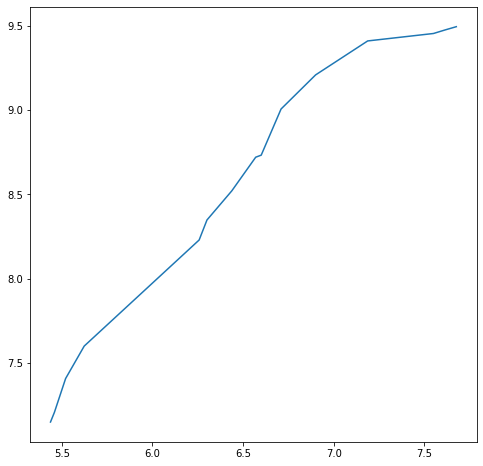

In [8]:
plt.figure(figsize=(8,8))
plt.plot(np.log(x),np.log(y))
plt.show()

In [61]:
MMQ(x,y)

Os coeficientes da sua regressão são:  [936.92611263   6.51278635]
O Coeficiente de Determinação foi calculado como: 0.9075803077741366
O Coeficiente de Determinação Ajustado foi calculado como: 0.8921770257364927


In [62]:
MMQ(np.log(x),np.log(y))

Os coeficientes da sua regressão são:  [1.55941175 1.06877952]
O Coeficiente de Determinação foi calculado como: 0.9542519170326038
O Coeficiente de Determinação Ajustado foi calculado como: 0.9466272365380378


In [63]:
x_ = np.vstack((x,x**2))
MMQ(x_,y)

Os coeficientes da sua regressão são:  [-2.29277419e+03  1.51085966e+01 -3.67990621e-03]
O Coeficiente de Determinação foi calculado como: 0.9830048802443014
O Coeficiente de Determinação Ajustado foi calculado como: 0.9783698475836564


In [47]:
x_.shape

(2, 15)